# Astrostatistics

# Seminar 1 
## 9/9

Probability theory 
- a Bernoulli probability distribution has p=0.5(fair binary outcome)
    - an MCMC algorithmn depends on a bernoulli process to make decisions 
- whenever you have discrete probablities (one outcome or the other) you have a prob mass function instead of a prob density function 
- $f(k;p)$ is the function $f$, depending on $k$, parameterized by $p$
- you can represent the probability mass function of a coin toss as such:
$$ f(k;p) = p^{k}(1-p)^{1-k} \text{ for } k \in \{0, 1\} $$
- where depending on the outcome the probability is either p or 1-p (and for a coin toss p is 0.5)
- so how can you find the probability of three heads? 
    - Pr(0 heads) = Pr(fail) x Pr(fail) x Pr(fail), Pr(3 heads) = same for Pr(suc) -- for the case where Pr(fail) = 1/2, the answer is 1/8 
    - for Pr(1 head) = Pr(suc) x Pr(fail) x Pr(fail) + Pr(fail) x Pr(suc) x Pr(fail) + Pr(fail) x Pr(fail) x Pr(suc) = 3/8
    - similarly Pr(2 head) = 3/8 
- requirement for any probability mass function is that all probabilities sum to 1 
- the probability of getting $k$ successes from $n$ trials is a binomial distribution:
$$ f(k;n, p) = (n k) p^{k}(1-p)^{1-k}$$

col vec:
$$ 𝟷 & 𝟸 & -𝟹 \\ 𝟺 & 𝟶 & 𝟷 $$

### Simulating a coin toss 100 times: Bernoulli Experiment

In [2]:
import numpy as np

p = 0.5
n = 100

trial = [i+1 for i in range(n)] #so you can index counting from 1 instead of 0
frac = [0 for i in range(n)]

k = 0
for i in range(n): 
    uniform = np.random.uniform() #np doesn't have bernoulli experiment, just make ur own
    if uniform<p:
        k = k+1
    frac[i] = float(k)/float(trial[i])

```python
#another way to do it
frac = []
...
    frac.append(x)
    
#or use numpy arrays
frac = np.empty(n)
...
    frac[i] = x
#if you want a list
np.array(frac).tolist()
```   

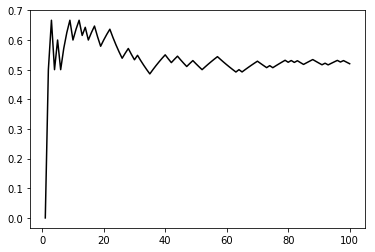

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(trial, frac, 'k-')

### Binomial Experiment

In [4]:
jmax = 1000 #num simulations to run

for j in range(jmax):
    k=0
    for i in range(n):
        uniform = np.random.uniform()
        if uniform<p:
            k = k+1
        frac[i] = float(k)/float(trial[i])
    if j>0:
        result = np.vstack([result,frac]) #append to result
    else:
        result=np.array(frac) #define result for the first line / first iteration

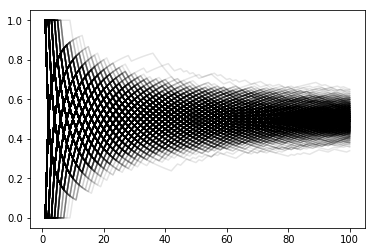

In [5]:
for j in range(jmax):
    plt.plot(trial, result[j], 'k-', alpha=0.1)

Try doing the same thing with appends instead of list comprehension, which is faster? 

In [6]:
p = 0.5
n = 100

trial = [i+1 for i in range(n)] #so you can index counting from 1 instead of 0
frac = []

k = 0
for i in range(n): 
    uniform = np.random.uniform() #np doesn't have bernoulli experiment, just make ur own
    if uniform<p:
        k = k+1
    frac.append(float(k)/float(trial[i]))

appending to a list takes 10ms while list comprehension takes 737ms! 

# Lab 1

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import matplotlib
rcparams = {}
rcparams['text.usetex'] = True
rcparams['axes.linewidth'] = 0.5 
rcparams['font.family'] = 'Times New Roman'
rcparams['font.size'] = 16
matplotlib.rcParams.update(rcparams)

# File Header:

ASSIGMENT 1 DATA

Column 1 = distance [Mpc]
Column 2 = error on distance [Mpc]
Column 3 = velocity [km/s]


In [36]:
with open('data.dat') as f:
    print(f.readlines())

['38.36\t2.68\t2627.12\n', '58.46\t10.74\t3418.08\n', '68.32\t12.21\t4237.29\n', '71.24\t3.55\t4802.26\n', '72.34\t9.21\t5112.99\n', '84.76\t7.70\t4887.01\n', '84.76\t13.04\t5536.72\n', '93.89\t8.84\t6016.95\n', '96.82\t8.87\t6694.92\n', '109.24\t12.68\t7372.88\n', '114.35\t6.11\t7909.60\n', '115.81\t7.20\t7485.88\n', '132.62\t11.98\t7909.60\n', '139.93\t14.18\t8728.81\n', '151.86\t12.97\t9849.34\n', '158.19\t13.50\t9209.04\n', '162.58\t13.63\t9152.54\n', '164.04\t9.32\t10781.54\n', '176.10\t6.58\t12966.1\n', '181.58\t12.79\t10762.71\n', '190.83\t15.34\t11092.28\n', '208.98\t17.54\t13917.14\n', '227.00\t14.61\t15178.91\n', '234.79\t16.99\t14726.93\n', '237.47\t16.81\t13578.15\n', '248.07\t14.43\t15536.72\n', '251.36\t12.97\t17419.96\n', '253.18\t20.82\t15065.91\n', '253.67\t19.91\t15112.99\n', '269.02\t16.08\t18229.76\n', '275.47\t26.85\t14839.92\n', '319.19\t21.01\t19105.46\n', '329.18\t16.62\t23757.06\n', '337.58\t24.48\t22504.71\n', '370.34\t31.42\t21261.77\n', '401.88\t27.58\t26355

In [37]:
data = np.loadtxt('/Users/yasmeenasali/Files/Class_Material/Astrostats/data.dat')
data

array([[3.836000e+01, 2.680000e+00, 2.627120e+03],
       [5.846000e+01, 1.074000e+01, 3.418080e+03],
       [6.832000e+01, 1.221000e+01, 4.237290e+03],
       [7.124000e+01, 3.550000e+00, 4.802260e+03],
       [7.234000e+01, 9.210000e+00, 5.112990e+03],
       [8.476000e+01, 7.700000e+00, 4.887010e+03],
       [8.476000e+01, 1.304000e+01, 5.536720e+03],
       [9.389000e+01, 8.840000e+00, 6.016950e+03],
       [9.682000e+01, 8.870000e+00, 6.694920e+03],
       [1.092400e+02, 1.268000e+01, 7.372880e+03],
       [1.143500e+02, 6.110000e+00, 7.909600e+03],
       [1.158100e+02, 7.200000e+00, 7.485880e+03],
       [1.326200e+02, 1.198000e+01, 7.909600e+03],
       [1.399300e+02, 1.418000e+01, 8.728810e+03],
       [1.518600e+02, 1.297000e+01, 9.849340e+03],
       [1.581900e+02, 1.350000e+01, 9.209040e+03],
       [1.625800e+02, 1.363000e+01, 9.152540e+03],
       [1.640400e+02, 9.320000e+00, 1.078154e+04],
       [1.761000e+02, 6.580000e+00, 1.296610e+04],
       [1.815800e+02, 1.279000e

In [38]:
data[0:3]

array([[3.83600e+01, 2.68000e+00, 2.62712e+03],
       [5.84600e+01, 1.07400e+01, 3.41808e+03],
       [6.83200e+01, 1.22100e+01, 4.23729e+03]])

In [39]:
dist_data = data[:,0]
err_dist_data = data[:,1]
velocity_data = data[:,2]

In [40]:
z = np.polyfit(velocity_data, dist_data, 1)
p = np.poly1d(z)
x_vals = np.linspace(0, 40000, 100000)

Text(0.5, 0, 'Velocity $[\\frac{km}{s}]$')

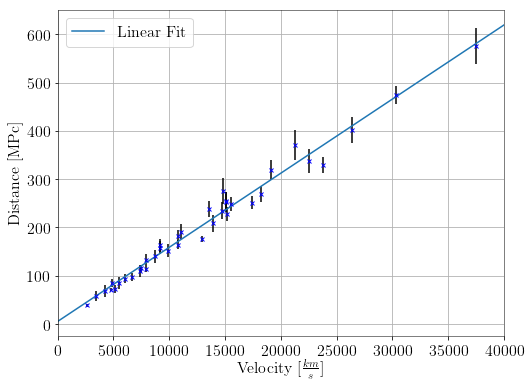

In [46]:
plt.figure(figsize=(8,6))
plt.errorbar(velocity_data, dist_data, yerr=err_dist_data, fmt='o', ecolor='k',color='b', ms=4, marker='x')
plt.plot(x_vals, p(x_vals), label='Linear Fit')
plt.xlim(0, 40000)
plt.legend()
plt.grid()
plt.ylabel(r"Distance [MPc]")
plt.xlabel(r"Velocity $[\frac{km}{s}]$")

In [58]:
# Linear regression
def normal_coeffs(x, y):
    m = int(np.size(velocity_data))

    # This is the feature / parameter (2x2) vector that will
    # contain my minimized values
    theta = []

    # Create a bias_vector to add a column of ones to initial x vector to make a 2d X matrix
    # Column of ones = intercept term
    bias_vector = np.ones((m, 1))

    # Reshape original x(m,) vector to X matrix
    X = np.reshape(x, (m, 1))
    X = np.append(bias_vector, X, axis=1)
    X_transpose = np.transpose(X)

    # Normal Equation:
    # theta = inv(X^T * X) * X^T * y

    # Calculating theta
    theta = np.linalg.inv(X_transpose.dot(X))
    theta = theta.dot(X_transpose)
    theta = theta.dot(y)

    return theta

[intercept, slope] = normalEquation(velocity_data, dist_data)
norm_eq = [(slope*x + intercept) for x in x_vals]

Text(0.5, 0, 'Velocity $[\\frac{km}{s}]$')

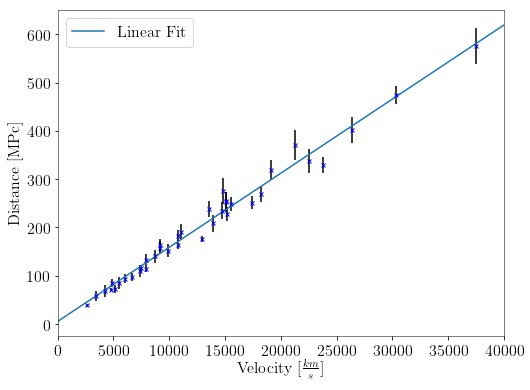

In [59]:
plt.figure(figsize=(8,6))
plt.errorbar(velocity_data, dist_data, yerr=err_dist_data, fmt='o', ecolor='k',color='b', ms=4, marker='x')
plt.plot(x_vals, norm_eq, label='Linear Fit')
plt.xlim(0, 40000)
plt.legend()
plt.ylabel(r"Distance [MPc]")
plt.xlabel(r"Velocity $[\frac{km}{s}]$")